In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px

In [77]:
xm=pd.read_csv("survey_results_public.csv")

In [7]:
xm.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [76]:
xm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 80 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ResponseId                      73268 non-null  int64   
 1   MainBranch                      73268 non-null  object  
 2   Employment                      71709 non-null  object  
 3   RemoteWork                      58958 non-null  object  
 4   CodingActivities                58899 non-null  object  
 5   EdLevel                         71571 non-null  object  
 6   LearnCode                       71580 non-null  object  
 7   LearnCodeOnline                 50685 non-null  object  
 8   LearnCodeCoursesCert            29389 non-null  object  
 9   YearsCode                       71331 non-null  object  
 10  YearsCodePro                    51833 non-null  object  
 11  DevType                         61302 non-null  object  
 12  OrgSize           

In [9]:
xm.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [10]:
xm.shape

(73268, 79)

## Demographic Analysis:
### Age distribution, Gender distribution, Geographic distribution and Education levels

### Age distribution

In [11]:
m=xm["Age"].value_counts(normalize=True).sort_index()
m

18-24 years old       0.234629
25-34 years old       0.396245
35-44 years old       0.197164
45-54 years old       0.074437
55-64 years old       0.027880
65 years or older     0.007809
Prefer not to say     0.007344
Under 18 years old    0.054492
Name: Age, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

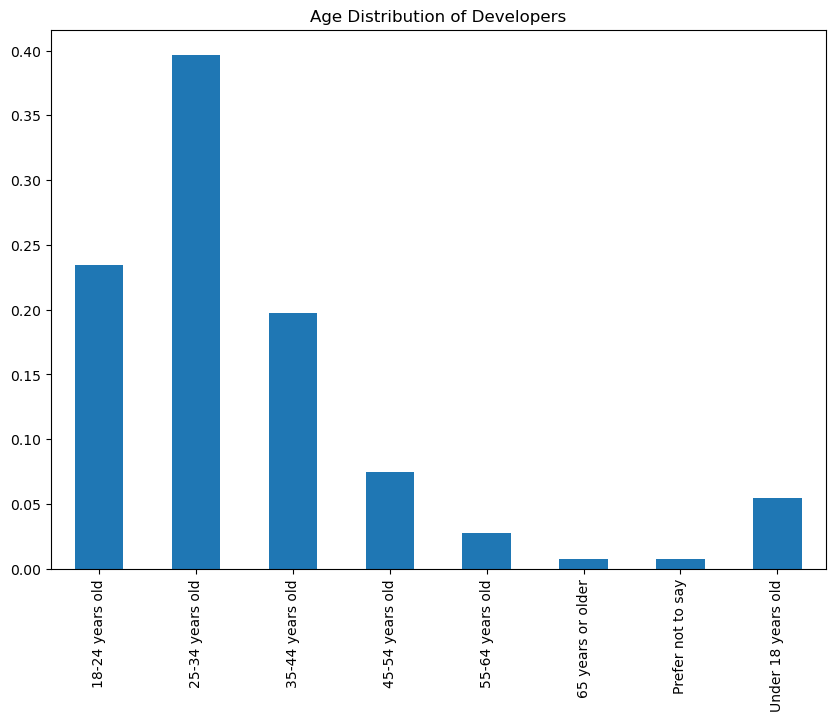

In [12]:
m.plot(kind="bar", figsize=(10,7))
plt.title('Age Distribution of Developers')
plt.show

### Insight 1
#### In terms of age distribution, 25-34 years of age of developers ranked highest with approximately 40%, followed by 18-24 years of age as 23%. This shows that young folks are dominating the Technological space from the survey.

### Gender distribution

In [13]:
a=xm["Gender"].value_counts(normalize=True)
a

Man                                                                                   0.911846
Woman                                                                                 0.047973
Prefer not to say                                                                     0.016541
Non-binary, genderqueer, or gender non-conforming                                     0.009936
Or, in your own words:                                                                0.003938
Man;Non-binary, genderqueer, or gender non-conforming                                 0.003317
Man;Or, in your own words:                                                            0.002413
Woman;Non-binary, genderqueer, or gender non-conforming                               0.002258
Man;Woman;Non-binary, genderqueer, or gender non-conforming                           0.000438
Man;Woman                                                                             0.000339
Man;Or, in your own words:;Woman;Non-binary, gende

<function matplotlib.pyplot.show(close=None, block=None)>

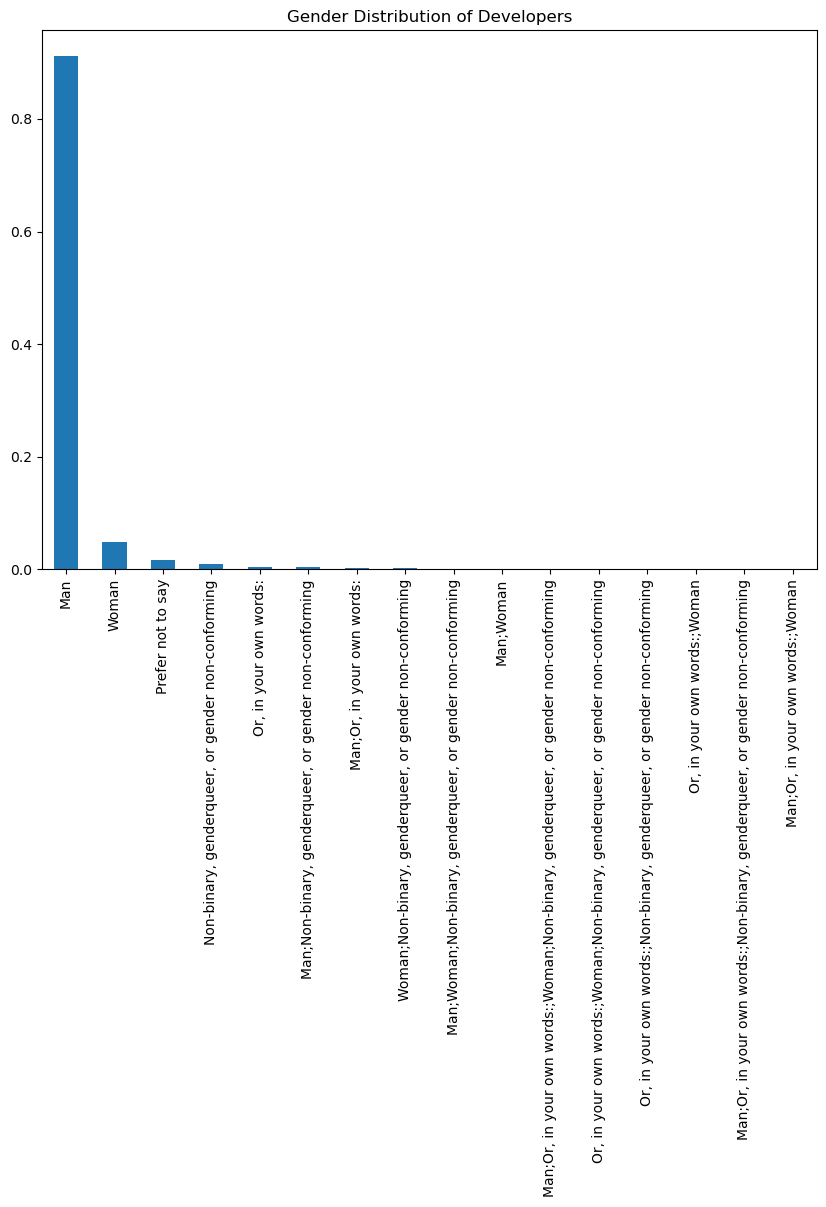

In [14]:
a.plot(kind="bar", figsize=(10,7))
plt.title('Gender Distribution of Developers')
plt.show

### Insight 2
#### Man was king here with 91% of total distribution to the woman with approximately 5%. This shows that the male gender has higher affinity for Tech compared to the female.

### Geographic distribution

In [15]:
b=xm["Country"].value_counts(normalize=True).head(15)
b

United States of America                                0.188697
India                                                   0.092503
Germany                                                 0.075170
United Kingdom of Great Britain and Northern Ireland    0.058380
Canada                                                  0.034694
France                                                  0.032436
Brazil                                                  0.029385
Poland                                                  0.024132
Netherlands                                             0.021666
Spain                                                   0.021192
Italy                                                   0.021095
Australia                                               0.020370
Russian Federation                                      0.017124
Turkey                                                  0.014212
Sweden                                                  0.014212
Name: Country, dtype: flo

<function matplotlib.pyplot.show(close=None, block=None)>

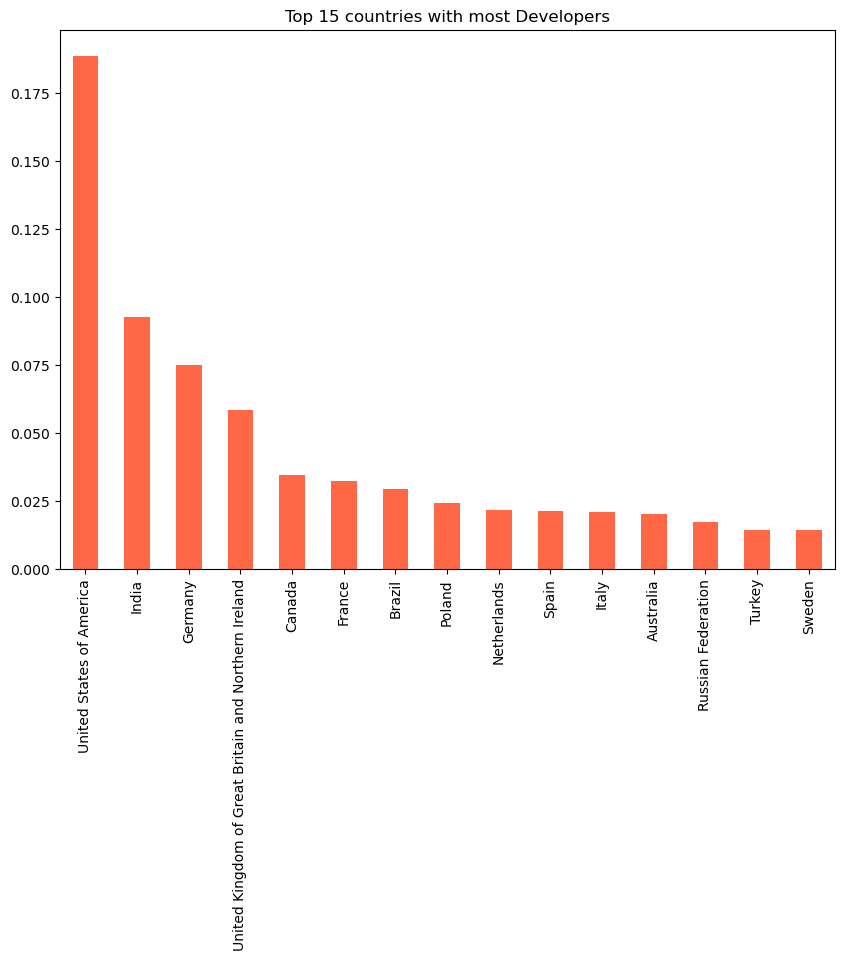

In [16]:
b.plot(kind="bar", figsize=(10,7), color='#FF5733', alpha=0.9, label='Orange Dots')
plt.title('Top 15 countries with most Developers')
plt.show

### Insight 3
#### Approximately 19% of the Tech developers hail from The United states of America followed by 9% form India with 7% from Germany, 5% from United kingdom of great Britain and northern Ireland.

In [17]:
c=xm["EdLevel"].value_counts(normalize=True)
c

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          0.423020
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       0.216373
Some college/university study without earning a degree                                0.130304
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.110436
Associate degree (A.A., A.S., etc.)                                                   0.031242
Other doctoral degree (Ph.D., Ed.D., etc.)                                            0.030306
Primary/elementary school                                                             0.025234
Something else                                                                        0.017423
Professional degree (JD, MD, etc.)                                                    0.015663
Name: EdLevel, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

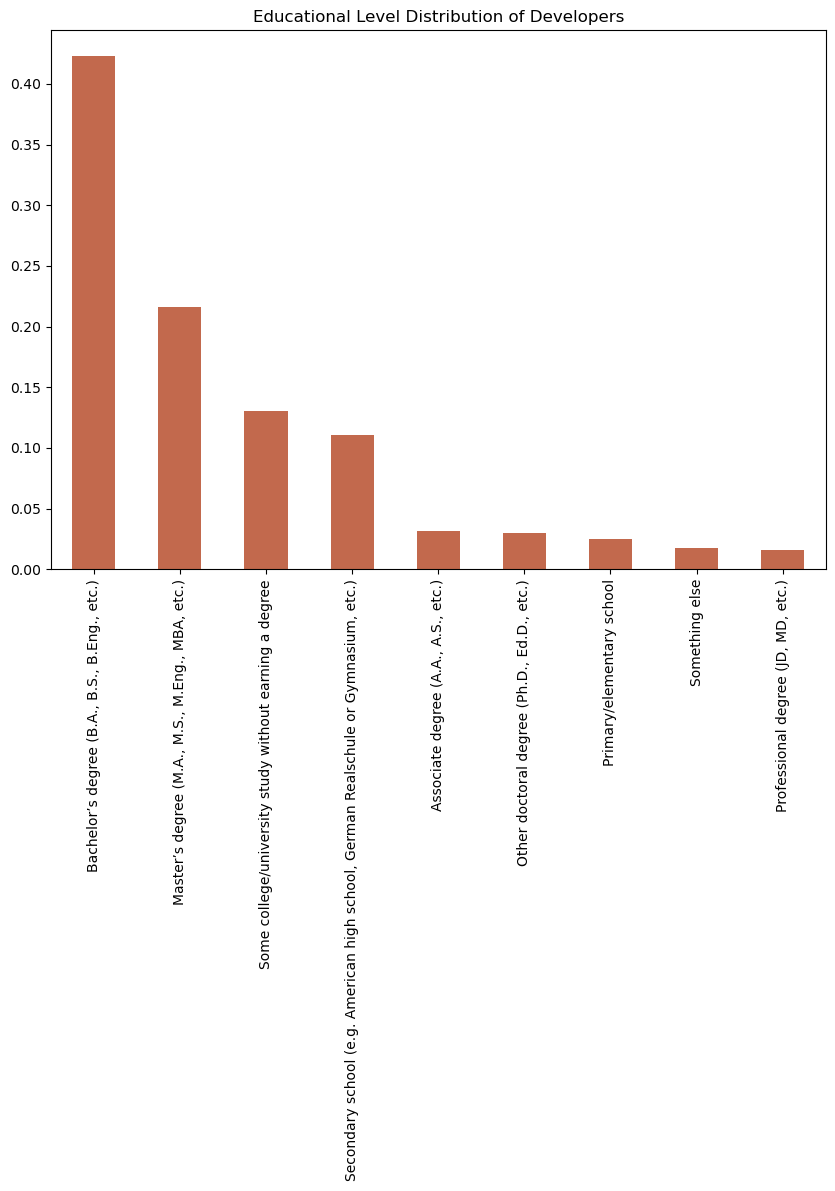

In [18]:
c.plot(kind="bar", figsize=(10,7), color='#BC5939', alpha=0.9, label='Orange Dots')
plt.title('Educational Level Distribution of Developers')
plt.show

### Insight 4
#### 42% of the Tech developers are Bachelor's degree holder while 21% are Master's degree holder. We can draw inference that the Tech world is mostly crowded by the young and middle age people...This is true from the analysis on Age distribution where we saw the 25-34 age bracket ranking the highest, with 40%, with 18-24 following with 23%.

### Technology usage analysis
#### Most popular programming languages, Databases, Preferred frameworks and libraries, Development environments and tools and Version control systems.

In [19]:
d=xm[['LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'VersionControlSystem']]
d.head(5)

,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,VersionControlSystem
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JavaScript;TypeScript,NaN,NaN,NaN,NaN,NaN,Git
2,C#;C++;HTML/CSS;JavaScript;Python,Microsoft SQL Server,NaN,Angular.js,Pandas,NaN,Git
3,C#;JavaScript;SQL;TypeScript,Microsoft SQL Server,NaN,ASP.NET;ASP.NET Core,.NET,NaN,Git
4,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,Cloud Firestore;Elasticsearch;Microsoft SQL Se...,Firebase;Microsoft Azure,Angular;ASP.NET;ASP.NET Core ;jQuery;Node.js,.NET,npm,Git;Other (please specify):


### Language worked with

In [20]:
xm['LanguageHaveWorkedWith']

0                                                      NaN
1                                    JavaScript;TypeScript
2                        C#;C++;HTML/CSS;JavaScript;Python
3                             C#;JavaScript;SQL;TypeScript
4              C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript
                               ...                        
73263    Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...
73264            Bash/Shell;HTML/CSS;JavaScript;Python;SQL
73265                   HTML/CSS;JavaScript;PHP;Python;SQL
73266                                        C#;Delphi;VBA
73267          C#;JavaScript;Lua;PowerShell;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 73268, dtype: object

In [21]:
# Analyzing languages worked with and seperating them into individual columns
e=d['LanguageHaveWorkedWith'].str.split(';', expand=True)
e.head(5)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JavaScript,TypeScript,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,C#,C++,HTML/CSS,JavaScript,Python,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,C#,JavaScript,SQL,TypeScript,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,C#,HTML/CSS,JavaScript,SQL,Swift,TypeScript,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [22]:
# Stacking the languages or values in variable e so as to analyze the frequency of each language
f=e.stack().value_counts(normalize=True)
f.head(10)

JavaScript    0.126265
HTML/CSS      0.106416
SQL           0.095500
Python        0.092858
TypeScript    0.067294
Java          0.064281
Bash/Shell    0.056158
C#            0.054056
C++           0.043565
PHP           0.040310
dtype: float64

Text(0.5, 1.0, 'Progaramming language distribution of developers')

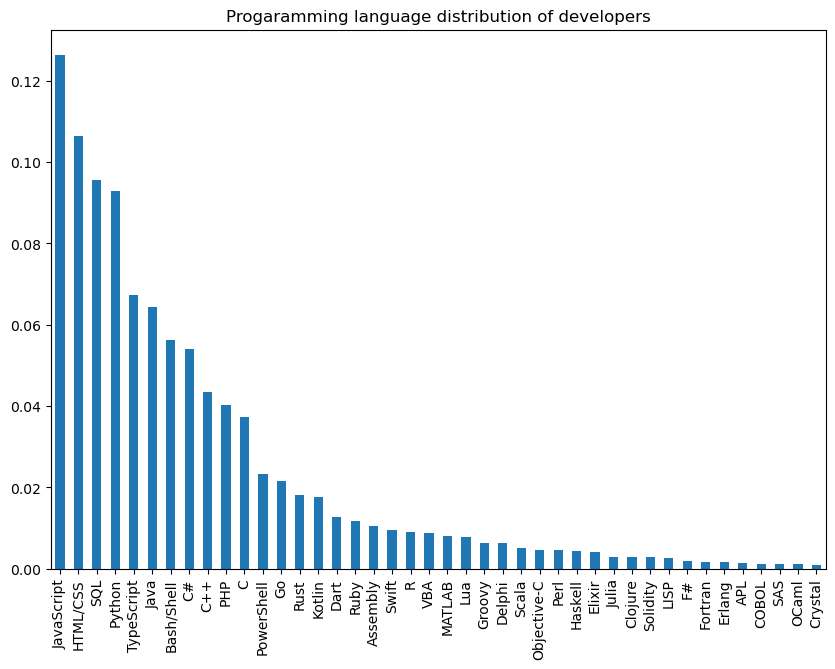

In [23]:
f.plot(kind="bar", figsize=(10,7))
plt.title("Progaramming language distribution of developers")

### Insight 5
#### Javascript happens to be the most frequently used language, followed by HTML/CSS and then SQL with Python ranking as the fourth most frequently used language.

### Database worked with

In [24]:
# Analyzing Database worked with and seperating them into individual columns
g=d['DatabaseHaveWorkedWith']
g.head(5)

0                                                  NaN
1                                                  NaN
2                                 Microsoft SQL Server
3                                 Microsoft SQL Server
4    Cloud Firestore;Elasticsearch;Microsoft SQL Se...
Name: DatabaseHaveWorkedWith, dtype: object

In [25]:
g=d['DatabaseHaveWorkedWith'].str.split(';', expand=True)
g.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Microsoft SQL Server,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Microsoft SQL Server,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Cloud Firestore,Elasticsearch,Microsoft SQL Server,Firebase Realtime Database,None,None,None,None,None,None,None,None,None,None,None,None,None
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Cloud Firestore,MongoDB,Firebase Realtime Database,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,MongoDB,MySQL,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Stacking the Database worked with or values in variable g so as to analyze the frequency of each Database worked with
h=g.stack().value_counts(normalize=True)
h.head(10)

MySQL                         0.170243
PostgreSQL                    0.158412
SQLite                        0.116323
MongoDB                       0.102838
Microsoft SQL Server          0.097627
Redis                         0.080412
MariaDB                       0.065137
Elasticsearch                 0.044352
Oracle                        0.041749
Firebase Realtime Database    0.031691
dtype: float64

Text(0.5, 1.0, 'Database worked with by developers')

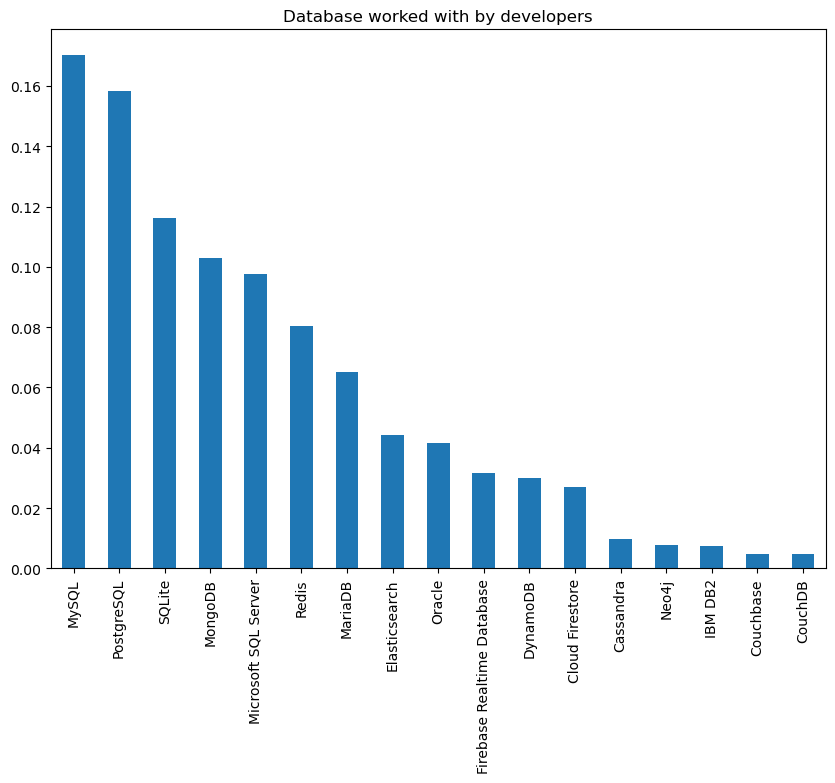

In [27]:
h.plot(kind="bar", figsize=(10,7))
plt.title("Database worked with by developers")

### Insight 6
#### MYSQL database happens to be the most frequently used database by developers, ranking 17% followed by PostgreSQL ranking approximately 16%.

### Frameworks worked with

In [28]:
xm['WebframeHaveWorkedWith']

0                                                 NaN
1                                                 NaN
2                                          Angular.js
3                               ASP.NET;ASP.NET Core 
4        Angular;ASP.NET;ASP.NET Core ;jQuery;Node.js
                             ...                     
73263                         Express;FastAPI;Node.js
73264                          FastAPI;Flask;React.js
73265                                ASP.NET;React.js
73266                                             NaN
73267    ASP.NET Core ;Blazor;Node.js;React.js;Svelte
Name: WebframeHaveWorkedWith, Length: 73268, dtype: object

In [29]:
# Analyzing frameworks worked with and seperating them into individual columns
i=xm['WebframeHaveWorkedWith'].str.split(";", expand=True)
i.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angular.js,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,ASP.NET,ASP.NET Core,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Angular,ASP.NET,ASP.NET Core,jQuery,Node.js,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Angular,Next.js,Node.js,React.js,Svelte,Vue.js,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,jQuery,Node.js,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Stacking the frameworks worked with or values in variable i so as to analyze the frequency of each framework worked with
j=i.stack().value_counts(normalize=True)
j.head(10)

Node.js          0.149236
React.js         0.134992
jQuery           0.090482
Express          0.072823
Angular          0.064594
Vue.js           0.059606
ASP.NET Core     0.058893
ASP.NET          0.047201
Django           0.046407
Flask            0.046360
dtype: float64

Text(0.5, 1.0, 'Frameworks worked with by developers')

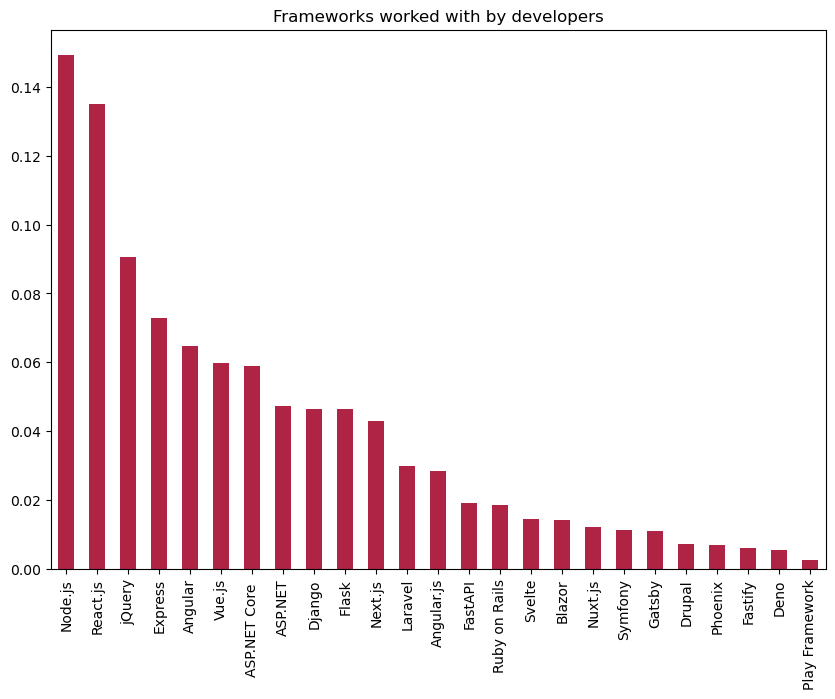

In [31]:
j.plot(kind="bar", figsize=(10,7), color="#AF2345")
plt.title("Frameworks worked with by developers")

### Insight 7
#### Most frequently used framework by developers from the survey revealed Node.js ranking as approximately 15% with React.js coming next and ranked as 13% and then jQuery being ranked as 9%.

### Version control system worked with

In [32]:
xm['VersionControlSystem']

0                                NaN
1                                Git
2                                Git
3                                Git
4        Git;Other (please specify):
                    ...             
73263                            Git
73264                            Git
73265                            Git
73266                            SVN
73267                            Git
Name: VersionControlSystem, Length: 73268, dtype: object

In [33]:
xm['VersionControlSystem'].value_counts()

Git                                          62055
I don't use one                               3080
Git;SVN                                       2858
Git;Other (please specify):                   1356
SVN                                            590
Other (please specify):                        523
Git;Mercurial                                  498
Mercurial                                      134
Git;Mercurial;SVN                              104
Git;Other (please specify):;SVN                 83
Git;Other (please specify):;Mercurial           28
Other (please specify):;SVN                     26
Git;Other (please specify):;Mercurial;SVN       24
Mercurial;SVN                                   13
Other (please specify):;Mercurial                5
Other (please specify):;Mercurial;SVN            2
Name: VersionControlSystem, dtype: int64

In [34]:
# Analyzing version control systems worked with and seperating them into individual columns
j=xm['VersionControlSystem'].str.split(";", expand=True)
j

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,Git,None,None,None
2,Git,None,None,None
3,Git,None,None,None
4,Git,Other (please specify):,None,None
...,...,...,...,...
73263,Git,None,None,None
73264,Git,None,None,None
73265,Git,None,None,None
73266,SVN,None,None,None


In [35]:
# Stacking the version control system worked with or values in variable k so as to analyze the frequency of each version control system worked with
k=j.stack().value_counts(normalize=True)
k

Git                        0.874284
SVN                        0.048277
I don't use one            0.040187
Other (please specify):    0.026709
Mercurial                  0.010543
dtype: float64

k.plot(kind="bar")

### Insight 8
#### Git happens to be the most frequently used version control system, rankling as 87% with SVN coming next as 4% in terms of usage frequency.

### Employment analysis
#### Types of employment (full-time, part-time, freelance, etc.)

In [36]:
xm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [37]:
xm["Employment"].value_counts()

Employed, full-time                                                                                                                    42962
Student, full-time                                                                                                                      6756
Independent contractor, freelancer, or self-employed                                                                                    4978
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                3486
Not employed, but looking for work                                                                                                      1831
                                                                                                                                       ...  
Student, part-time;Independent contractor, freelancer, or self-employed;Retired                                                            1
Employed, ful

In [38]:
k=xm["Employment"].str.split(";", expand=True)
k

,0,1,2,3,4,5,6,7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Employed, full-time",None,None,None,None,None,None,None
2,"Employed, full-time",None,None,None,None,None,None,None
3,"Employed, full-time",None,None,None,None,None,None,None
4,"Employed, full-time",None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
73263,"Employed, full-time",None,None,None,None,None,None,None
73264,"Employed, full-time",None,None,None,None,None,None,None
73265,"Employed, full-time",None,None,None,None,None,None,None
73266,"Employed, full-time",None,None,None,None,None,None,None


In [39]:
l=k.stack().value_counts(normalize=True)
l

Employed, full-time                                     0.583203
Student, full-time                                      0.129587
Independent contractor, freelancer, or self-employed    0.127086
Employed, part-time                                     0.049241
Student, part-time                                      0.044120
Not employed, but looking for work                      0.040078
Not employed, and not looking for work                  0.014746
I prefer not to say                                     0.007243
Retired                                                 0.004694
dtype: float64

Text(0.5, 1.0, "Visualization of developer's employment status")

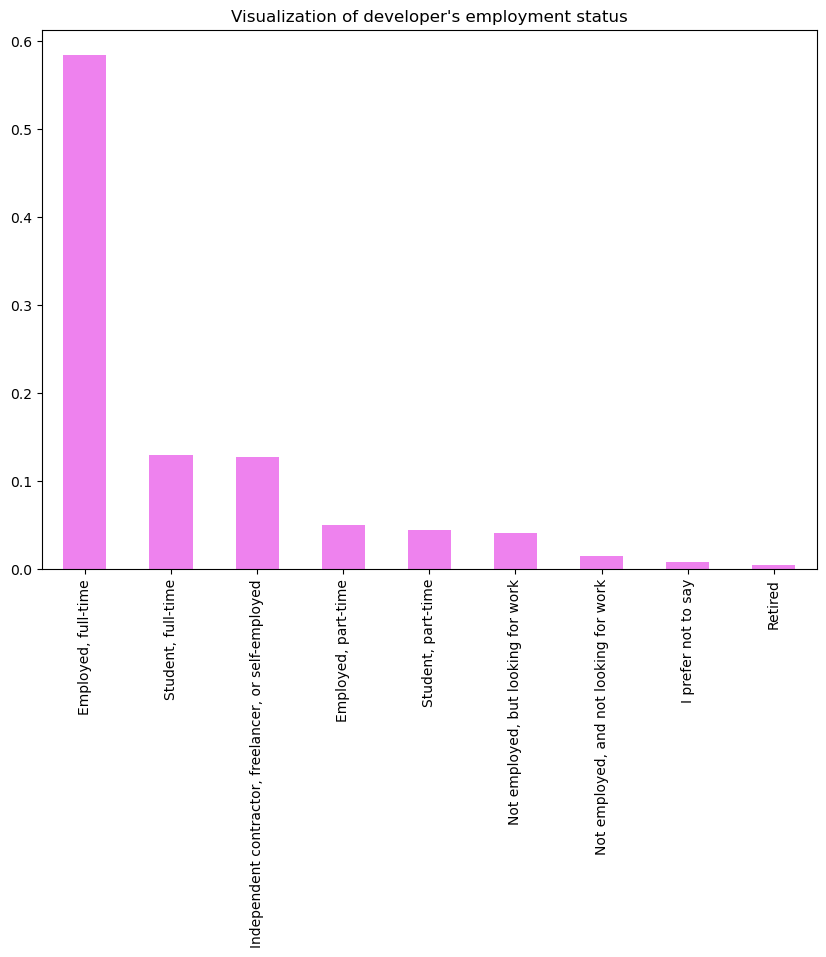

In [40]:
l.plot(kind="bar", figsize=(10,7), color="violet")
plt.title("Visualization of developer's employment status")

### Insight 9
#### It shows a larger percentage of the developers are full-time workers, 58% as it were, while approximately 13% are full-time students. So, you could be a tech developer and still be working. Though approximately 13% were freelancers and self-employed. 

### Salary and Compensation analysis of developers.

#### Developer salaries by country, region, and experience level, Correlation between education and salary, Salary differences between genders and ethnicities.

In [41]:
m=xm[["Currency", "CompFreq", "CompTotal"]].value_counts().reset_index()
m

,Currency,CompFreq,CompTotal,0
0,USD\tUnited States dollar,Yearly,1.500000e+05,388
1,USD\tUnited States dollar,Yearly,2.000000e+05,357
2,USD\tUnited States dollar,Yearly,1.200000e+05,310
3,EUR European Euro,Yearly,6.000000e+04,306
4,USD\tUnited States dollar,Yearly,1.000000e+05,274
...,...,...,...,...
9507,INR\tIndian rupee,Yearly,2.280000e+06,1
9508,INR\tIndian rupee,Yearly,2.278153e+06,1
9509,INR\tIndian rupee,Yearly,2.267426e+06,1
9510,CNY\tChinese Yuan Renminbi,Yearly,4.400000e+05,1


In [42]:
m.rename(columns={0:"Count"}, inplace=True)

In [43]:
m

,Currency,CompFreq,CompTotal,Count
0,USD\tUnited States dollar,Yearly,1.500000e+05,388
1,USD\tUnited States dollar,Yearly,2.000000e+05,357
2,USD\tUnited States dollar,Yearly,1.200000e+05,310
3,EUR European Euro,Yearly,6.000000e+04,306
4,USD\tUnited States dollar,Yearly,1.000000e+05,274
...,...,...,...,...
9507,INR\tIndian rupee,Yearly,2.280000e+06,1
9508,INR\tIndian rupee,Yearly,2.278153e+06,1
9509,INR\tIndian rupee,Yearly,2.267426e+06,1
9510,CNY\tChinese Yuan Renminbi,Yearly,4.400000e+05,1


In [44]:
pd.options.display.float_format = '{:,.2f}'.format

In [45]:
m

,Currency,CompFreq,CompTotal,Count
0,USD\tUnited States dollar,Yearly,"150,000.00",388
1,USD\tUnited States dollar,Yearly,"200,000.00",357
2,USD\tUnited States dollar,Yearly,"120,000.00",310
3,EUR European Euro,Yearly,"60,000.00",306
4,USD\tUnited States dollar,Yearly,"100,000.00",274
...,...,...,...,...
9507,INR\tIndian rupee,Yearly,"2,280,000.00",1
9508,INR\tIndian rupee,Yearly,"2,278,153.00",1
9509,INR\tIndian rupee,Yearly,"2,267,426.00",1
9510,CNY\tChinese Yuan Renminbi,Yearly,"440,000.00",1


In [48]:
m=xm[["Currency", "CompFreq", "CompTotal", "ConvertedCompYearly"]].value_counts().reset_index()
m

,Currency,CompFreq,CompTotal,ConvertedCompYearly,0
0,USD\tUnited States dollar,Yearly,"150,000.00","150,000.00",388
1,USD\tUnited States dollar,Yearly,"200,000.00","200,000.00",356
2,USD\tUnited States dollar,Yearly,"120,000.00","120,000.00",309
3,EUR European Euro,Yearly,"60,000.00","63,986.00",304
4,USD\tUnited States dollar,Yearly,"100,000.00","100,000.00",274
...,...,...,...,...,...
9363,GBP\tPound sterling,Yearly,"28,800.00","36,184.00",1
9364,GBP\tPound sterling,Yearly,"28,008.00","35,189.00",1
9365,GBP\tPound sterling,Yearly,"27,600.00","34,676.00",1
9366,GBP\tPound sterling,Yearly,"26,400.00","33,169.00",1


In [49]:
m.rename(columns={0:"Count"}, inplace=True)
m

,Currency,CompFreq,CompTotal,ConvertedCompYearly,Count
0,USD\tUnited States dollar,Yearly,"150,000.00","150,000.00",388
1,USD\tUnited States dollar,Yearly,"200,000.00","200,000.00",356
2,USD\tUnited States dollar,Yearly,"120,000.00","120,000.00",309
3,EUR European Euro,Yearly,"60,000.00","63,986.00",304
4,USD\tUnited States dollar,Yearly,"100,000.00","100,000.00",274
...,...,...,...,...,...
9363,GBP\tPound sterling,Yearly,"28,800.00","36,184.00",1
9364,GBP\tPound sterling,Yearly,"28,008.00","35,189.00",1
9365,GBP\tPound sterling,Yearly,"27,600.00","34,676.00",1
9366,GBP\tPound sterling,Yearly,"26,400.00","33,169.00",1


In [50]:
# Converted compensation yearly is used because it is standardized to dollars
# As a result, it could be used for comparison across countries unlike Compensation 
# total that is according to the currency of the different countries

n=xm.groupby("Country")["ConvertedCompYearly"].median()
n.reset_index().head(10)

,Country,ConvertedCompYearly
0,Afghanistan,"10,894.00"
1,Albania,"15,360.00"
2,Algeria,"7,440.00"
3,Andorra,"76,784.00"
4,Angola,"3,073.50"
5,Antigua and Barbuda,NaN
6,Argentina,"30,300.00"
7,Armenia,"46,080.00"
8,Australia,"93,772.00"
9,Austria,"59,720.00"


### NOTE:

The choice between using median or mean for salary statistics hinges on data characteristics and analysis objectives. Median, the middle value in ordered data, is robust against outliers, revealing the central point. It's preferred for skewed or outlier-affected data. Mean, the average, can be skewed by outliers and suits assessing overall average.

For instance, data.groupby('Country')['ConvertedSalary'].median() calculates median salary per country. It's common for salaries due to outlier-resistance. Replacing median() with mean() for overall average can be done, but note outlier influence.

The provided values depict median salaries per country. Half earn less than this value. E.g., in Afghanistan, the median salary of $10,894 represents the middle of salary distribution.

Keep in mind, these medians reflect respondent averages in each country, giving a glimpse into developer income distribution. Individual salaries vary due to factors like experience, role, industry, and location.

In [51]:
n.nlargest(10).reset_index()

,Country,ConvertedCompYearly
0,Monaco,"5,000,000.00"
1,Haiti,"1,560,600.00"
2,United States of America,"145,000.00"
3,Israel,"128,238.00"
4,Barbados,"125,001.00"
5,Lao People's Democratic Republic,"120,000.00"
6,Switzerland,"113,761.00"
7,Ireland,"95,979.00"
8,Australia,"93,772.00"
9,Canada,"93,701.00"


Text(0.5, 1.0, 'The median salary figures for the top 10 countries.')

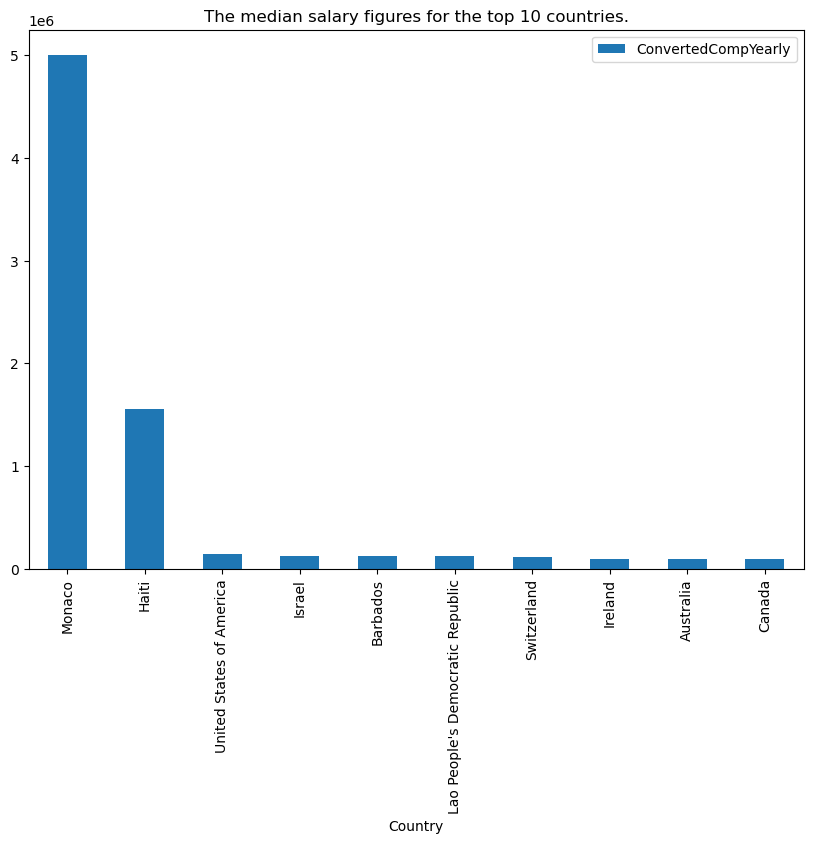

In [52]:
n.nlargest(10).reset_index().plot(kind="bar", x="Country", figsize=(10,7))
plt.title("The median salary figures for the top 10 countries.")

### Insight 10
#### Monaco came out as the country with the highest paid developer with a developer receiving a yearly income of 5M Dollars, this is followed by Haiti, with a developer receiving approximately 1.6M Dollars and USA coming 3rd with a developer receiving 145,000 Dollars per annum. These estimates were based on Median.

### Correlation between Education and Salary Analysis

In [53]:
p=xm.groupby("EdLevel")["ConvertedCompYearly"].median().sort_values(ascending=False)
p

EdLevel
Other doctoral degree (Ph.D., Ed.D., etc.)                                           85,513.00
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                      70,000.00
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                         69,318.00
Associate degree (A.A., A.S., etc.)                                                  69,102.00
Some college/university study without earning a degree                               63,984.00
Primary/elementary school                                                            57,672.00
Something else                                                                       53,322.00
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)   51,189.00
Professional degree (JD, MD, etc.)                                                   44,793.00
Name: ConvertedCompYearly, dtype: float64

<Axes: xlabel='EdLevel'>

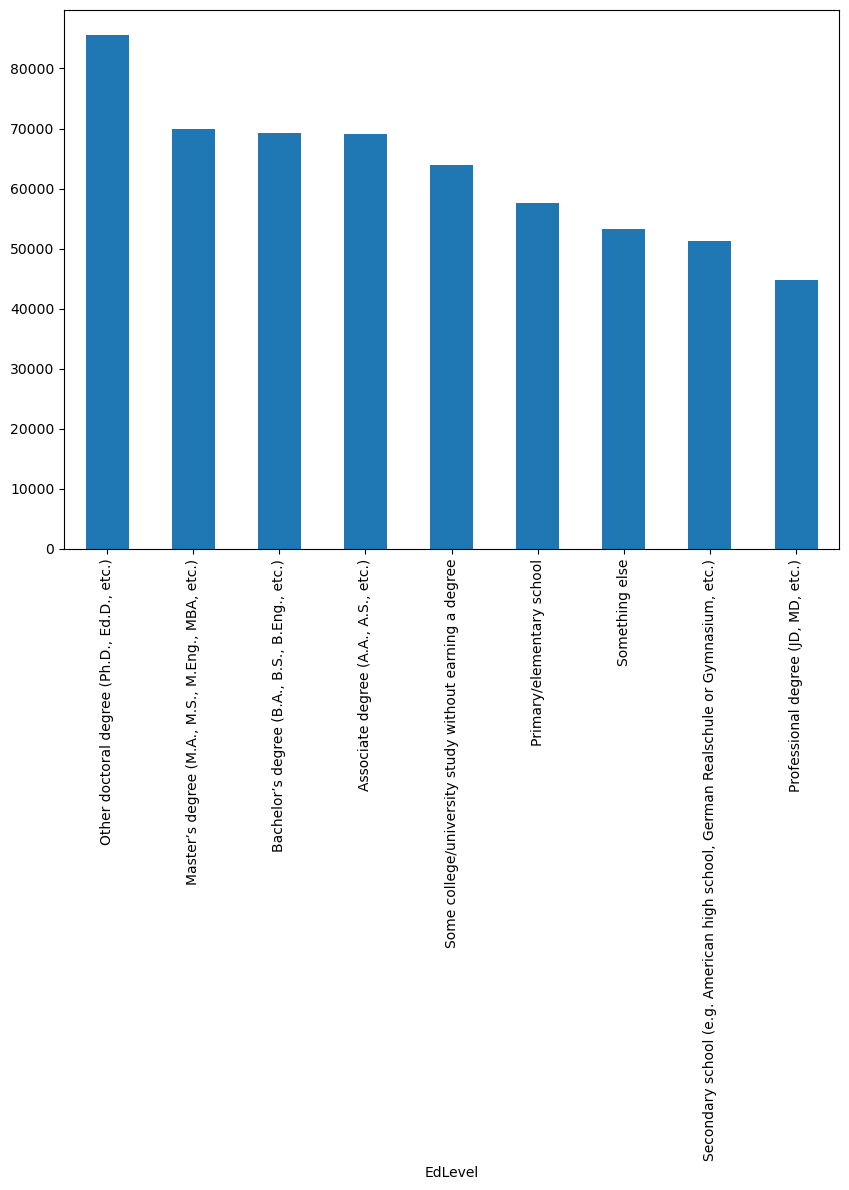

In [54]:
p.plot(kind="bar", figsize=(10,7))


### Insight

#### It is obvoius that developers with Doctorate degree like Ph.D., Ed.D., etc had the highest paid, followed by Master's degree holders like M.A., M.S., M.Eng., MBA, etc, followed by Bachelor's degree holders like B.A., B.S., B.Eng., etc

### Correlation between Ethnicity and Salary Analysis

In [55]:
q=xm.groupby("Ethnicity")["ConvertedCompYearly"].median().sort_values(ascending=False).reset_index()
q

,Ethnicity,ConvertedCompYearly
0,European;Central American;Hispanic or Latino/a,"16,793,882.00"
1,White;Asian;South Asian;Multiracial,"6,734,500.00"
2,White;Multiracial;Indigenous (such as Native A...,"5,527,586.50"
3,White;European;North American;African;Caribbea...,"3,500,000.00"
4,European;North American;Multiracial,"3,315,000.00"
...,...,...
1050,"White;Or, in your own words:;North American;Hi...",NaN
1051,"White;Or, in your own words:;North American;Hi...",NaN
1052,"White;Or, in your own words:;North American;Mi...",NaN
1053,White;South American;Multiracial;Biracial,NaN


In [56]:
r=q.nlargest(10,"ConvertedCompYearly")
r

,Ethnicity,ConvertedCompYearly
0,European;Central American;Hispanic or Latino/a,"16,793,882.00"
1,White;Asian;South Asian;Multiracial,"6,734,500.00"
2,White;Multiracial;Indigenous (such as Native A...,"5,527,586.50"
3,White;European;North American;African;Caribbea...,"3,500,000.00"
4,European;North American;Multiracial,"3,315,000.00"
5,Central American;Hispanic or Latino/a;Indigeno...,"1,920,000.00"
6,Ethnoreligious group;African;Black;Caribbean;M...,"1,920,000.00"
7,White;Indian;European;North American;Middle Ea...,"1,535,664.00"
8,"Or, in your own words:;African;Black","1,500,000.00"
9,Indian;North American;Asian;South Asian,"1,468,800.00"


<Axes: >

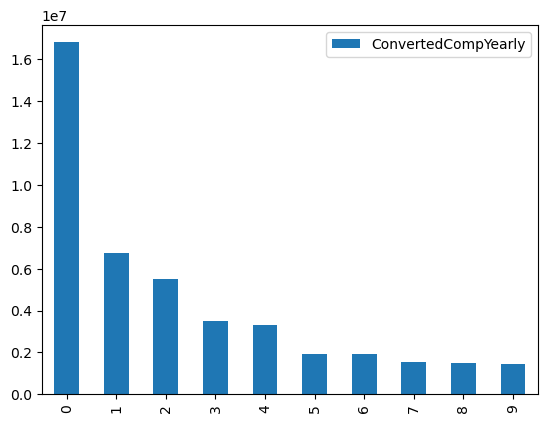

In [57]:
r.plot(kind="bar")

### Insight 11
#### The European ethnic group ranked as the highest in terms of salary analysis of developers...African Ethnic group is seen at the 4th level.

### Salary differences between genders and ethnicities

In [58]:
s=xm.groupby(["Gender","Ethnicity"])["ConvertedCompYearly"].median().reset_index().nlargest(10, "ConvertedCompYearly")
s

,Gender,Ethnicity,ConvertedCompYearly
1284,Prefer not to say,Central Asian,"50,000,000.00"
207,Man,European;Central American;Hispanic or Latino/a,"16,793,882.00"
583,Man,White;Asian;South Asian;Multiracial,"6,734,500.00"
821,Man,White;Multiracial;Indigenous (such as Native A...,"5,527,586.50"
1210,"Or, in your own words:",North American,"3,904,200.00"
1530,Woman,White;European;North American;African;Caribbea...,"3,500,000.00"
267,Man,European;North American;Multiracial,"3,315,000.00"
8,Man,African;Black;Caribbean,"2,100,000.00"
126,Man,Central American;Hispanic or Latino/a;Indigeno...,"1,920,000.00"
1043,"Man;Or, in your own words:;Woman;Non-binary, g...",Ethnoreligious group;African;Black;Caribbean;M...,"1,920,000.00"


<Axes: xlabel='Gender'>

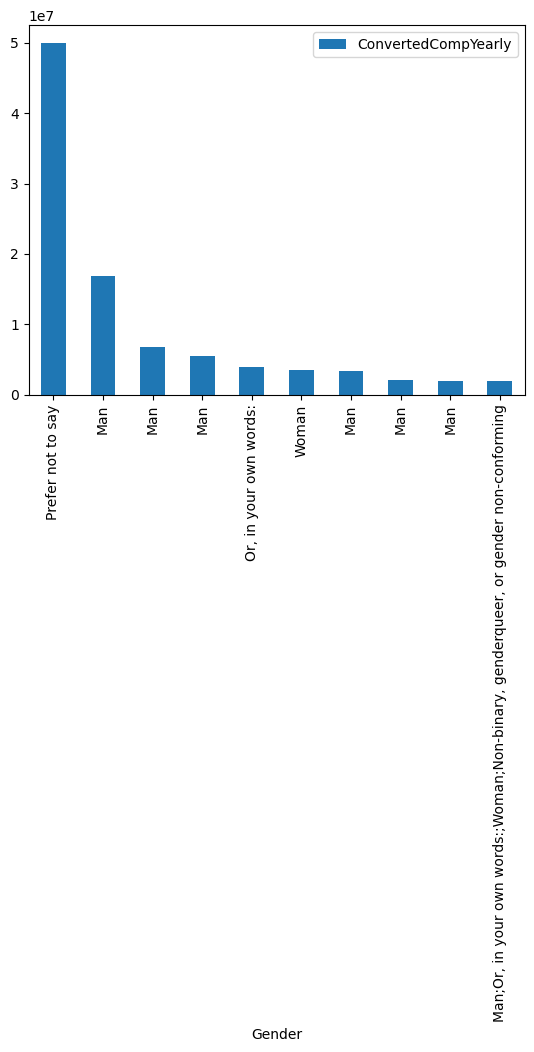

In [59]:
s.plot(kind="bar", x="Gender")

### Developer Education and Learning

In [61]:
xm[["EdLevel","LearnCode","LearnCodeOnline","LearnCodeCoursesCert","YearsCode","YearsCodePro","DevType"]]

,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...
3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack"
4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,"Developer, front-end;Developer, full-stack;Dev..."
...,...,...,...,...,...,...,...
73263,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,"Developer, back-end"
73264,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,Data scientist or machine learning specialist
73265,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,"Developer, full-stack;Developer, desktop or en..."
73266,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,NaN,NaN,50,31,"Developer, front-end;Developer, desktop or ent..."


In [62]:
t=xm["LearnCode"].str.split(";",expand=True)
t

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Books / Physical media,Friend or family member,"Other online resources (e.g., videos, blogs, f...","School (i.e., University, College, etc)",None,None,None,None,None,None
3,Books / Physical media,"School (i.e., University, College, etc)",None,None,None,None,None,None,None,None
4,"Other online resources (e.g., videos, blogs, f...","School (i.e., University, College, etc)",On the job training,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
73263,Books / Physical media,"Other online resources (e.g., videos, blogs, f...",On the job training,Online Courses or Certification,None,None,None,None,None,None
73264,"Other online resources (e.g., videos, blogs, f...","School (i.e., University, College, etc)",On the job training,Online Courses or Certification,None,None,None,None,None,None
73265,Books / Physical media,"Other online resources (e.g., videos, blogs, f...","School (i.e., University, College, etc)",Online Courses or Certification,None,None,None,None,None,None
73266,Books / Physical media,On the job training,None,None,None,None,None,None,None,None


In [75]:
ds=t.stack().value_counts(normalize=True)
ds

Other online resources (e.g., videos, blogs, forum)   0.22
School (i.e., University, College, etc)               0.19
Books / Physical media                                0.17
Online Courses or Certification                       0.14
On the job training                                   0.12
Colleague                                             0.06
Friend or family member                               0.04
Coding Bootcamp                                       0.03
Hackathons (virtual or in-person)                     0.02
Other (please specify):                               0.02
dtype: float64

In [72]:
v=["Other online resources (e.g., videos, blogs, forum","School (i.e., University, College, etc)","Books / Physical media ","Online Courses or Certification","On the job training","Colleague","Friend or family member","Coding Bootcamp","Hackathons (virtual or in-person)","Other (please specify)"]

Text(0.5, 1.0, 'Ways the various developers learnt to code')

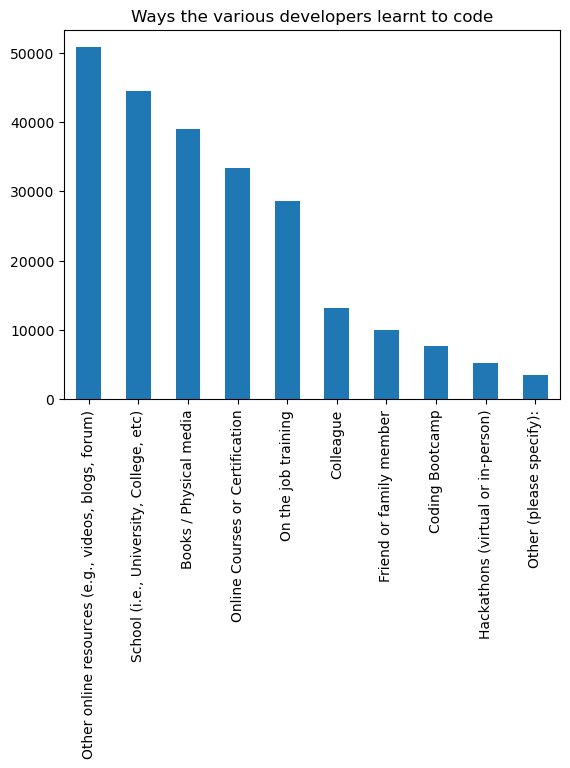

In [74]:
ds.plot(kind="bar")
plt.title("Ways the various developers learnt to code")

In [66]:
xm[["LearnCode","Age"]]

,LearnCode,Age
0,NaN,NaN
1,NaN,NaN
2,Books / Physical media;Friend or family member...,25-34 years old
3,"Books / Physical media;School (i.e., Universit...",35-44 years old
4,"Other online resources (e.g., videos, blogs, f...",25-34 years old
...,...,...
73263,Books / Physical media;Other online resources ...,25-34 years old
73264,"Other online resources (e.g., videos, blogs, f...",25-34 years old
73265,Books / Physical media;Other online resources ...,55-64 years old
73266,Books / Physical media;On the job training,55-64 years old


### Insight 12
#### Learning to code from online resources had the highest percentage of developers.